# SVC

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data = iris_data[iris_data['target'].isin([0,1])]
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.svm import SVC

In [7]:
svm = SVC(kernel='linear', probability=True)

In [8]:
svm.fit(X_train_std,y_train['target'].values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
svm.predict(X_test_std)

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [10]:
y_test['target'].values

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [11]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test['target'].values[i]:
        error+=1
print(error)

0


In [12]:
svm.predict_proba(X_test_std)

array([[0.94916697, 0.05083303],
       [0.00871779, 0.99128221],
       [0.97317147, 0.02682853],
       [0.00754384, 0.99245616],
       [0.01903938, 0.98096062],
       [0.12675099, 0.87324901],
       [0.98377882, 0.01622118],
       [0.00567101, 0.99432899],
       [0.01005062, 0.98994938],
       [0.01771206, 0.98228794],
       [0.02700754, 0.97299246],
       [0.03331373, 0.96668627],
       [0.00935055, 0.99064945],
       [0.97984086, 0.02015914],
       [0.9616977 , 0.0383023 ],
       [0.9414869 , 0.0585131 ],
       [0.9878135 , 0.0121865 ],
       [0.87642859, 0.12357141],
       [0.97988497, 0.02011503],
       [0.95581273, 0.04418727],
       [0.94916697, 0.05083303],
       [0.03828377, 0.96171623],
       [0.94913053, 0.05086947],
       [0.04102847, 0.95897153],
       [0.96676781, 0.03323219],
       [0.96908378, 0.03091622],
       [0.96166998, 0.03833002],
       [0.02348127, 0.97651873],
       [0.04393004, 0.95606996],
       [0.00703757, 0.99296243]])

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 畫出決定的平面
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,c=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

    # 標註測試的樣本
    if test_idx:
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],X_test[:, 1],c='',alpha=1.0,edgecolor='black',linewidths=1,marker='o',s=55, label='test set')

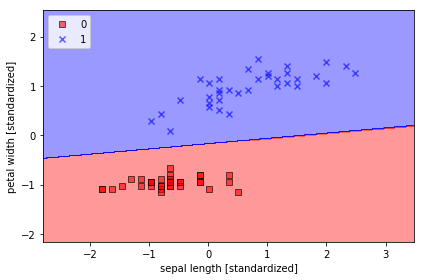

In [14]:
plot_decision_regions(X_train_std, y_train['target'].values, classifier=svm)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# SVR

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# 載入資料集
dataset = pd.read_csv('data/Position_Salaries.csv')
x = dataset.iloc[:,1].values
y = dataset.iloc[:,-1].values

In [17]:
# reshape x 和 y
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
standardscaler_x = StandardScaler()
x = standardscaler_x.fit_transform(x)
standardscaler_y = StandardScaler()
y = standardscaler_y.fit_transform(y)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
# reshape 成一維陣列
y = y.reshape(len(y),)
print(y)

[-0.72004253 -0.70243757 -0.66722767 -0.59680786 -0.49117815 -0.35033854
 -0.17428902  0.17781001  0.88200808  2.64250325]


In [20]:
# Fittign SVR模型使用POLY內核進行數據處理
from sklearn.svm import SVR
regressor = SVR(kernel='poly')
regressor = regressor.fit(x,y)

In [21]:
# 縮放測試數據以進行預測
test = np.zeros(1) # we are testing just one value
test[0]= 6.5
test = test.reshape(1,1) # reshape 成二維陣列
test = standardscaler_x.transform(test) 

In [22]:
# 做預測
y_pred = regressor.predict(test)
y_predict = standardscaler_y.inverse_transform(y_pred)

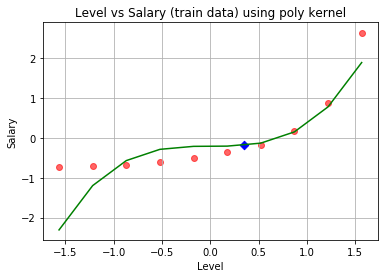

In [23]:
#視覺化fit的模型和數據集
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor.predict(x),color='green')
plt.title('Level vs Salary (train data) using poly kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [24]:
# 用RBF核與SVR模型fit數據
regressor2 = SVR(kernel='rbf')
regressor2 = regressor2.fit(x,y)

# 做預測
y_pred = regressor2.predict(test)
y_predict = standardscaler_y.inverse_transform(y_pred)

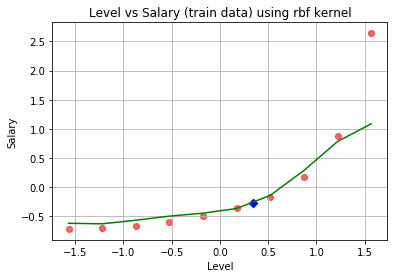

In [25]:
#視覺化fit的模型和數據集
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor2.predict(x),color='green')
plt.title('Level vs Salary (train data) using rbf kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.grid()
plt.show()